# Lecture 7: Visualización de Datos (Data Vizualitation - DataViz)

La visualización de datos es uno de los elementos más importantes de la visualización de datos.

In [115]:
# Importando librerías

## Librerías para graficar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Librerías sobre warnings
import warnings 

# Opciones
warnings.filterwarnings("ignore")
sns.set(style="white", color_codes=True)

# 1. Importar los datos

Vamos a descargar una base de datos de prueba. Estas bases de datos están dentro de los paquetes de Python y son bases de datos "bien comportadas". Es decir, son bases de datos que no tienen errores considerables dentro de la conformación de los datos y que tienen poca o nula pérdida de información. Aún así, para este caso es mejor utilizar una base de datos de este tipo, ya que nos centraremos en graficar y no en limpieza y preprocesamiento de datos.

Para este caso, utilizaremos `Iris`: una base de datos recogida por el estadistico y biólogo Ronald Fisher sobre 50 muestras de flores. En ella hay 3 tipos de flores, los cuales se pueden medir en 4 características. Con esta información, Fisher realizó un modelo linear para clasificar los tipos de flores.

Vamos a explorarla:

In [102]:
# pip install sklearn

In [117]:
# Importamos sklearn, la cual más adelante volveremos a tomar
from sklearn import datasets

# Importamos la base de datos
iris = datasets.load_iris()

Siempre se puede cargar la base de datos de un csv, pero también es importante que aprendamos cómo sacar bases de datos desde paquetes como `sklearn` para practicar con este tipo de bases. Ahora, si intentamos observar qué hay dentro de `iris`, ¿qué observamos?

In [118]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Debemos realizarle unos procesos:

In [119]:
# Creamos el data frame
data = pd.DataFrame(iris.data) # Se convierte los datos en dataframe
data['class'] = iris.target # Le agregamos el vector de la clase
data.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'clase'] # Renombramos columnas

# Observamos
data.head(10)

sepal_len  sepal_wid  petal_len  petal_wid  clase
0        5.1        3.5        1.4        0.2      0
1        4.9        3.0        1.4        0.2      0
2        4.7        3.2        1.3        0.2      0
3        4.6        3.1        1.5        0.2      0
4        5.0        3.6        1.4        0.2      0
5        5.4        3.9        1.7        0.4      0
6        4.6        3.4        1.4        0.3      0
7        5.0        3.4        1.5        0.2      0
8        4.4        2.9        1.4        0.2      0
9        4.9        3.1        1.5        0.1      0

Ahora, no es como necesitamos la base de datos, entonces carguemos la base de datos de un .csv de [Kaggle](https://www.kaggle.com/datasets/uciml/iris?resource=download):

In [120]:
iris = pd.read_csv("C:/Users/juanm/Documents/Profesorado/Big Data/Lecture 7 - Visualization/archive/Iris.csv")
iris

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]

# 2. Mini EDA

Revisemos un poco de la base de datos. En este caso, la batuta la tienen ustedes. Solo hagamos un paseo sobre lo esencial:

## 2.1. Características básicas de la base de datos

Revisemos cuántas observaciones y columnas hay

## 2.2. Calidad de la información

Revisemos cuántos valores perdidos tiene la base de datos

Revisemos cuántos valores únicos tiene cada una de las columnas

Revisemos qué columnas tenemos: ¿qué significa cada una?

Revisemos las clases: ¿qué tipo de clases hay? ¿Sí son 3?

Revisemos los tipos de datos que tenemos en nuestra base de datos: ¿qué tipos de datos tenemos? ¿Son los que necesitamos?

## 3. Visualization

## 3.1. Principios de la visualización

La visualización no es una tarea fácil. Para visualizar datos, debemos tener muy claros los conceptos que ellos involucran en nuestra cabeza y, además, saber cómo ponerlo en términos entendibles a otras personas. Ello es sumamente difícil, ya que tenemos que ponernos en la mente de otras personas para saber cómo hacer la mejor visualización. 

Schwabish (2021), propone los Principios de Gestalt de la percepción visual para ayudarnos a entender cómo pensamos y percibimos lo visual como humanos para construir mejores gráficas. Estos principios son:

1. **Proximidad:** percibimos los objetos cercanos entre ellos como pertenecientes a un grupo.
2. **Similitud:** los humanos agrupan objetos que comparten el mismo color, forma y dirección.
3. **Agrupación:** objetos encerrados son percibidos como grupos.
4. **Completitud:** nuestros cerebros ignoran las brechas y completa las estructuras.
5. **Continuidad:** objetos que están alineados juntos o se dan continuidad entre ellos son percibidos como un grupo.
6. **Conexión:** percibimos los objetos conectados como un mismo grupo.

Hay 5 líneas de acción para hacer una buena gráfica:

1. Muestra los datos.
2. Reduce el desorden.
3. Integra gráficas y texto.
4. Evita el gráfico spaguetti.
5. Empieza con gris

## 3.2. Taxonomía de una gráfica

Las gráficas, en programación, son bastantes lógicas: se construyen en orden. Vamos a ver algunos básicos:

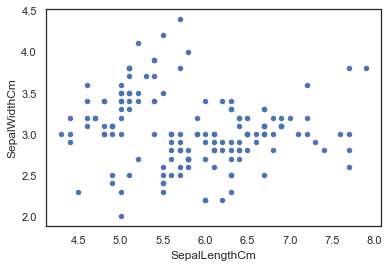

In [107]:
iris.plot(kind = "scatter", x = "SepalLengthCm", y = "SepalWidthCm")
plt.show()

Tenemos una gráfica simple, sin problemas e, incluso, entendible. Podemos irle agregando cosas, por ejemplo un título

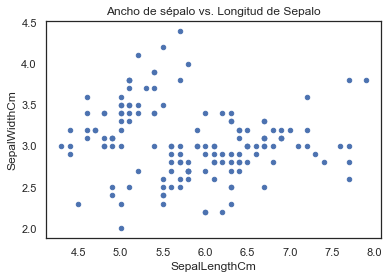

In [108]:
iris.plot(kind = "scatter", x = "SepalLengthCm", y = "SepalWidthCm")
plt.title("Ancho de sépalo vs. Longitud de Sepalo") # Agregamos un título
plt.show()

Agreguémosle nombres a los ejes x y y.

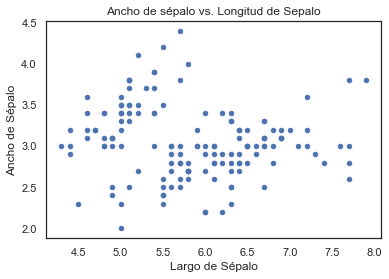

In [109]:
iris.plot(kind = "scatter", x = "SepalLengthCm", y = "SepalWidthCm")
plt.title("Ancho de sépalo vs. Longitud de Sepalo") # Agregamos un título
plt.xlabel("Largo de Sépalo") # Nombre al eje x
plt.ylabel("Ancho de Sépalo") # Nombre al eje y
plt.show()

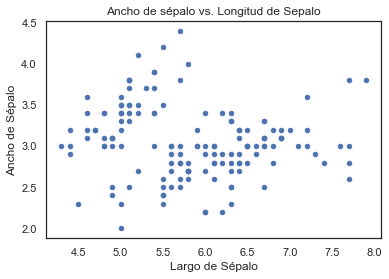

In [110]:
iris.plot(kind = "scatter", x = "SepalLengthCm", y = "SepalWidthCm")
plt.title("Ancho de sépalo vs. Longitud de Sepalo") # Agregamos un título
plt.xlabel("Largo de Sépalo") # Nombre al eje x
plt.ylabel("Ancho de Sépalo") # Nombre al eje y
plt.show()

## 3.3. Gráficos de dispersión (scatterplot)

Son gráficos simples que demuestran los puntos en un plano cartesiano de un par (o n cantidad) de variables. Ayudan a mostrar posibles enclaustramientos. Tenemos varias formas de hacerlo. Empecemos con `matplotlib`:

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

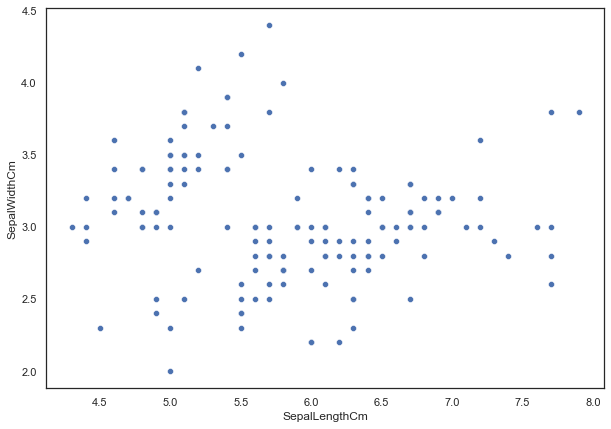

In [111]:
plt.figure(figsize = (10, 7))
sns.scatterplot(iris, x = "SepalLengthCm", y = "SepalWidthCm")

Estos también lo podemos dividir por tipo de clase de flor:

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

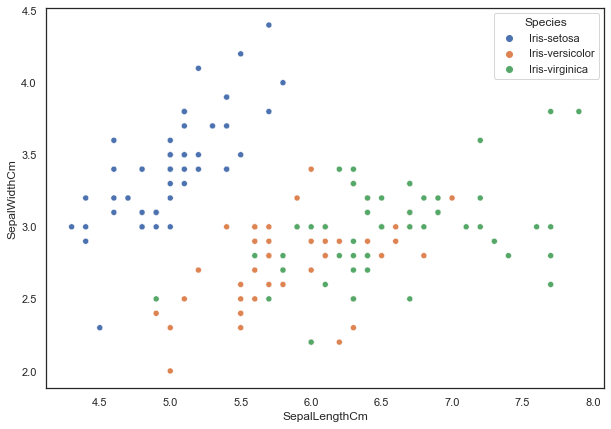

In [112]:
plt.figure(figsize = (10, 7))
sns.scatterplot(iris, x = "SepalLengthCm", y = "SepalWidthCm", hue = "Species")

<Figure size 720x504 with 0 Axes>

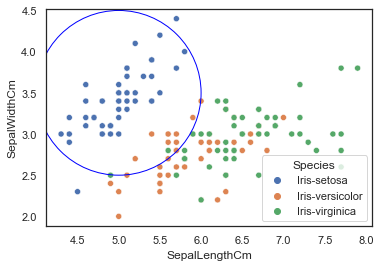

In [113]:
plt.figure(figsize = (10, 7))
figure, axes = plt.subplots()
sns.scatterplot(iris, x = "SepalLengthCm", y = "SepalWidthCm", hue = "Species")

Drawing_uncolored_circle = plt.Circle((5, 3.5),
                                      1,
                                      color = "blue",
                                      fill = False )
 
axes.set_aspect( 1 )
axes.add_artist( Drawing_uncolored_circle )
plt.show()

### 3.3.1. Gráficos de dispersión con gráficos de densidad

Los gráficos de dispersión se puede combinar con gráficos de densidad en la misma gráfica.

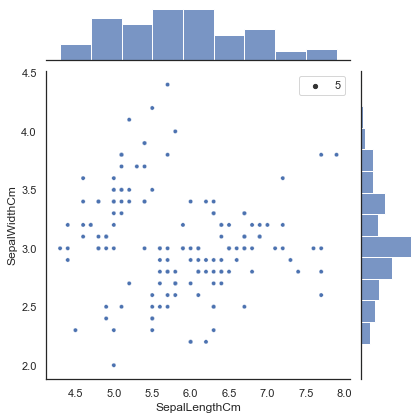

In [114]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=5)